In [91]:
#Part 1: Use a Web API to get URLs for news articles

In [2]:
#Use key I got by signing in
newsapi_key = 'fd210b469f29483ea092fbc98def9358'

In [3]:
import requests

In [71]:
#Define functions with source as input and loop through each article, get url and append it to list.
def getNews(source):
    endpoint = 'https://newsapi.org/v2/top-headlines'
    parameters = {
        'apiKey' : newsapi_key,
        'sources' : source
    }
    resp = requests.get(endpoint, params=parameters)
    data = resp.json()
    result = []
    for article in data['articles']:
        result.append(article['url'])
    return result

In [85]:
#Test the function 
getNews('cnbc')

['https://www.cnbc.com/2019/05/04/trump-retweets-conspiracy-theorists-far-right-figures-after-facebook-bans.html',
 'https://www.cnbc.com/2019/05/04/buffett-hints-again-at-who-his-successor-is-but-largely-avoids-issue.html',
 'https://www.cnbc.com/2019/05/04/kraft-heinz-chief-marketing-officer-departs.html',
 'https://www.cnbc.com/2019/05/04/warren-buffett-says-berkshires-purchase-of-high-flying-amazon-was-still-value-investing.html',
 'https://www.cnbc.com/2019/05/04/warren-buffett-if-a-bank-needs-a-government-bailout-the-ceo-and-spouse-should-lose-net-worth.html',
 'https://www.cnbc.com/2019/05/03/iphone-camera-tips-and-tricks.html',
 'https://www.cnbc.com/2019/05/04/trump-says-kim-jong-un-does-not-want-to-break-his-promise-despite-north-koreas-latest-launches.html',
 'https://www.cnbc.com/2019/05/03/wall-street-is-overestimating-fed-rate-cut-odds-bond-investor-warns.html',
 'https://www.cnbc.com/2019/05/04/buffett-says-kraft-has-disagreement-with-auditor.html',
 'https://www.cnbc.co

In [6]:
#Part 2: Analyze a news article using IBM Watson Natural Language Understanding API

In [92]:
import requests
import json

def extractEntities(url, source):
    endpoint_watson = "https://gateway.watsonplatform.net/natural-language-understanding/api/v1/analyze"
    params = {
        'version': '2018-11-16',
    }
    headers = { 
        'Content-Type': 'application/json',
    }
    watson_options = {
      "url": url,
      "features": {
        "entities": {
          "sentiment": True
        }
      }
    }
    username = "apikey"
    password = "xSOLcYbCwXT5bRS36huaiwO9kO07_m1EaMa769hTMpcR"

    resp = requests.post(endpoint_watson, 
                         data=json.dumps(watson_options), 
                         headers=headers, 
                         params=params, 
                         auth=(username, password) 
                        )
    output= resp.json()
    extractlist = []
    for item in output['entities']:
        d = {
            "entity": item.get('text'),
            "url": url,
            "source": source,
            "relevance": item.get('relevance'),
            "sentiment_score": item.get('sentiment').get('score'),
            "sentiment_label": item.get('sentiment').get('label')
        }
        extractlist.append(d)
    return extractlist
    

In [93]:
url = 'https://www.cnbc.com/2019/05/04/trump-says-kim-jong-un-does-not-want-to-break-his-promise-despite-north-koreas-latest-launches.html'
source = 'cnbc'

In [94]:
extractEntities(url, source)

[{'entity': 'North Korea',
  'url': 'https://www.cnbc.com/2019/05/04/trump-says-kim-jong-un-does-not-want-to-break-his-promise-despite-north-koreas-latest-launches.html',
  'source': 'cnbc',
  'relevance': 0.788288,
  'sentiment_score': 0.12525,
  'sentiment_label': 'positive'},
 {'entity': 'President Donald Trump',
  'url': 'https://www.cnbc.com/2019/05/04/trump-says-kim-jong-un-does-not-want-to-break-his-promise-despite-north-koreas-latest-launches.html',
  'source': 'cnbc',
  'relevance': 0.785038,
  'sentiment_score': -0.091557,
  'sentiment_label': 'negative'},
 {'entity': 'Kim Jong Un',
  'url': 'https://www.cnbc.com/2019/05/04/trump-says-kim-jong-un-does-not-want-to-break-his-promise-despite-north-koreas-latest-launches.html',
  'source': 'cnbc',
  'relevance': 0.428606,
  'sentiment_score': -0.372933,
  'sentiment_label': 'negative'},
 {'entity': 'Pyongyang',
  'url': 'https://www.cnbc.com/2019/05/04/trump-says-kim-jong-un-does-not-want-to-break-his-promise-despite-north-koreas

In [190]:
#Part 3: Extract the entities that appear in the news and create a dashboard

In [141]:
import pandas as pd
import numpy as np

In [117]:
wsj = getNews("the-wall-street-journal")
wsjentities = []
for article in wsj:
    a = extractEntities(article, 'wsj')
    wsjentities.extend(a)
wsjdf = pd.DataFrame(wsjentities)
wsjdf

,entity,relevance,sentiment_label,sentiment_score,source,url
0,James Alex Fields Jr.,0.805476,negative,-0.552553,wsj,https://www.wsj.com/articles/charlottesville-a...
1,Heather Heyer,0.481115,neutral,0.000000,wsj,https://www.wsj.com/articles/charlottesville-a...
2,Charlottesville,0.438471,negative,-0.567444,wsj,https://www.wsj.com/articles/charlottesville-a...
3,Ohio,0.352475,negative,-0.567444,wsj,https://www.wsj.com/articles/charlottesville-a...
4,Va.,0.260404,neutral,0.000000,wsj,https://www.wsj.com/articles/charlottesville-a...
5,two years,0.260404,neutral,0.000000,wsj,https://www.wsj.com/articles/charlottesville-a...
6,32-year,0.260404,neutral,0.000000,wsj,https://www.wsj.com/articles/charlottesville-a...
7,Mexico,0.860200,negative,-0.796952,wsj,https://www.wsj.com/articles/southern-border-c...
8,Kevin McAleenan,0.632131,negative,-0.621549,wsj,https://www.wsj.com/articles/southern-border-c...
9,Secretary,0.586469,negative,-0.621549,wsj,https://www.wsj.com/articles/southern-border-c...


In [118]:
nyt = getNews("the-new-york-times")
nytentities = []
for article in nyt:
    b = extractEntities(article, 'nyt')
    nytentities.extend(b)
nytdf = pd.DataFrame(nytentities)
nytdf

,entity,relevance,sentiment_label,sentiment_score,source,url
0,France,0.916343,negative,-0.107685,nyt,https://www.nytimes.com/2019/06/28/sports/socc...
1,United States,0.725553,neutral,0.000000,nyt,https://www.nytimes.com/2019/06/28/sports/socc...
2,Megan Rapinoe,0.551651,positive,0.325487,nyt,https://www.nytimes.com/2019/06/28/sports/socc...
3,Alex Morgan,0.432122,positive,0.293409,nyt,https://www.nytimes.com/2019/06/28/sports/socc...
4,Coach Corinne Diacre,0.426018,neutral,0.000000,nyt,https://www.nytimes.com/2019/06/28/sports/socc...
5,Crystal Dunn,0.391191,negative,-0.497109,nyt,https://www.nytimes.com/2019/06/28/sports/socc...
6,Wendie Renard,0.361206,negative,-0.193260,nyt,https://www.nytimes.com/2019/06/28/sports/socc...
7,Kadidiatou Diani,0.333072,neutral,0.000000,nyt,https://www.nytimes.com/2019/06/28/sports/socc...
8,Amandine Henry,0.327683,negative,-0.250191,nyt,https://www.nytimes.com/2019/06/28/sports/socc...
9,— Ertz,0.320150,neutral,0.000000,nyt,https://www.nytimes.com/2019/06/28/sports/socc...


In [162]:
#We need to consolidate both data frames
consdf = wsjdf.append(nytdf)
consdf

,entity,relevance,sentiment_label,sentiment_score,source,url
0,James Alex Fields Jr.,0.805476,negative,-0.552553,wsj,https://www.wsj.com/articles/charlottesville-a...
1,Heather Heyer,0.481115,neutral,0.000000,wsj,https://www.wsj.com/articles/charlottesville-a...
2,Charlottesville,0.438471,negative,-0.567444,wsj,https://www.wsj.com/articles/charlottesville-a...
3,Ohio,0.352475,negative,-0.567444,wsj,https://www.wsj.com/articles/charlottesville-a...
4,Va.,0.260404,neutral,0.000000,wsj,https://www.wsj.com/articles/charlottesville-a...
5,two years,0.260404,neutral,0.000000,wsj,https://www.wsj.com/articles/charlottesville-a...
6,32-year,0.260404,neutral,0.000000,wsj,https://www.wsj.com/articles/charlottesville-a...
7,Mexico,0.860200,negative,-0.796952,wsj,https://www.wsj.com/articles/southern-border-c...
8,Kevin McAleenan,0.632131,negative,-0.621549,wsj,https://www.wsj.com/articles/southern-border-c...
9,Secretary,0.586469,negative,-0.621549,wsj,https://www.wsj.com/articles/southern-border-c...


In [130]:
#Check data types of the consolidated data frame
consdf.dtypes

entity              object
relevance          float64
sentiment_label     object
sentiment_score    float64
source              object
url                 object
dtype: object

In [147]:
relevancep = pd.pivot_table(
    data = consdf,
    index = 'entity', #rows
    columns = 'source', #columns
    values = 'relevance', #cells
    aggfunc = 'sum' #function
)
relevancep = relevancep.dropna()
relevancep

source,nyt,wsj
entity,,
China,0.092464,1.075534
Iran,0.079734,0.361626
Japan,0.151655,0.277280
Miami,0.149811,0.841835
Mr. Trump,0.864337,0.448595
Va.,0.180096,0.260404
official,0.243312,0.467571
president,0.672272,0.418861
two years,0.526301,0.260404


In [150]:
sentimentp = pd.pivot_table(
    data = consdf,
    index = 'entity', #rows
    columns = 'source', #columns
    values = 'sentiment_score', #cells
    aggfunc = 'mean' #function
)
sentimentp = sentimentp.dropna()
sentimentp

source,nyt,wsj
entity,,
China,-0.293466,-0.164599
Iran,0.000000,-0.764955
Japan,-0.592207,0.450230
Miami,-0.235898,0.000000
Mr. Trump,-0.104908,0.450230
Va.,0.000000,0.000000
official,0.049237,-0.790807
president,0.118254,0.000000
two years,0.000000,0.000000


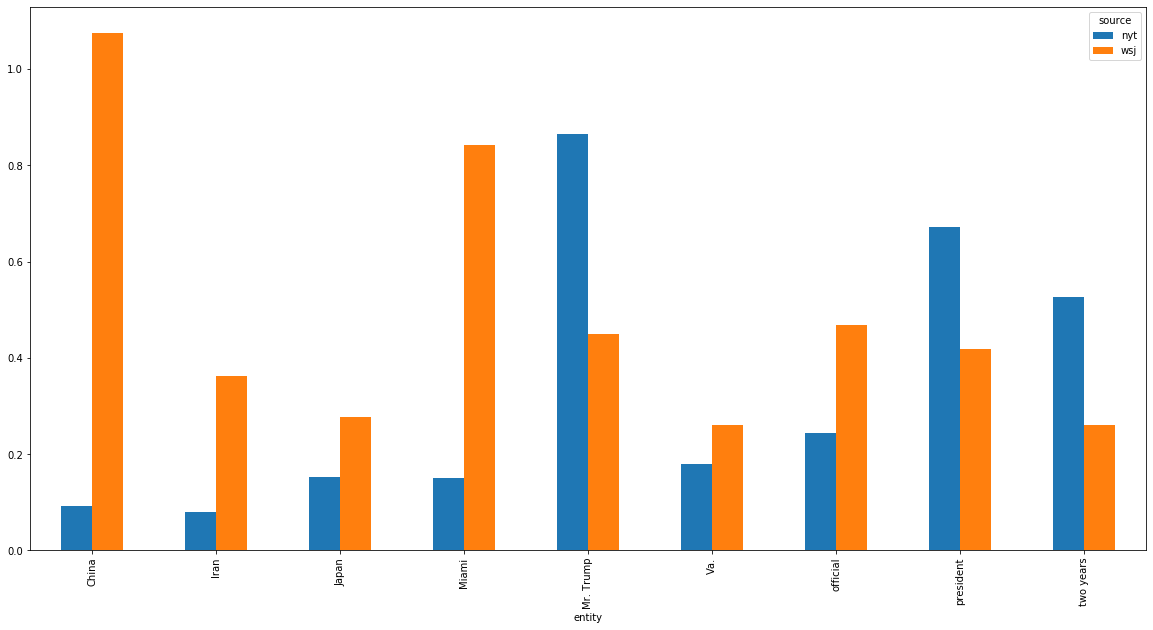

In [155]:
relevancep.plot(kind='bar', figsize=(20,10))

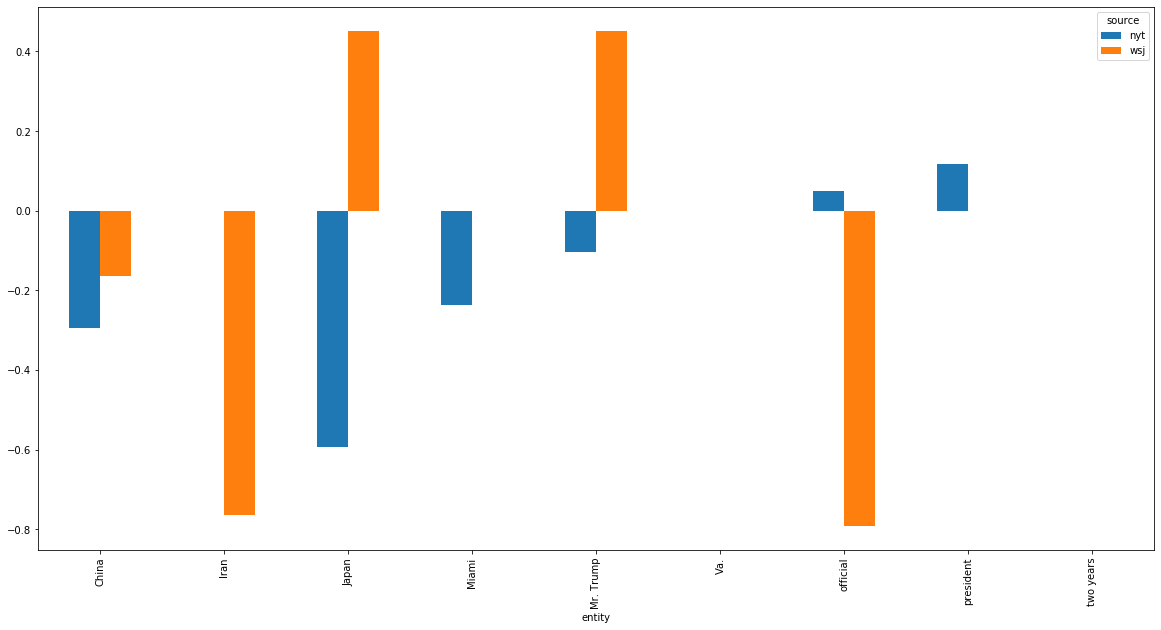

In [160]:
sentimentp.plot(kind='bar', figsize=(20,10))